<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/classification_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/data_mining')
print(os.getcwd())

/content/drive/My Drive/data_mining


#k-NN Challenge

In this challenge

1. Import and prepare the Breast Cancer training and
testing datasets.
2. Prepare the data.
3. Train and optimize the kNN model.
4. Plot the accuracy of the parameters.
5. Apply the kNN model to the training data.
6. Graph the confusion matrix.
7. Calculate the overall accuracy of the model on the
testing data.

###Import libraries



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


###Load and prepare data



In [24]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Scale features (important for kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
# Define parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance']
}

# Grid search with 5-fold CV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'n_neighbors': np.int64(8), 'weights': 'uniform'}
Best CV Accuracy: 0.9670329670329672


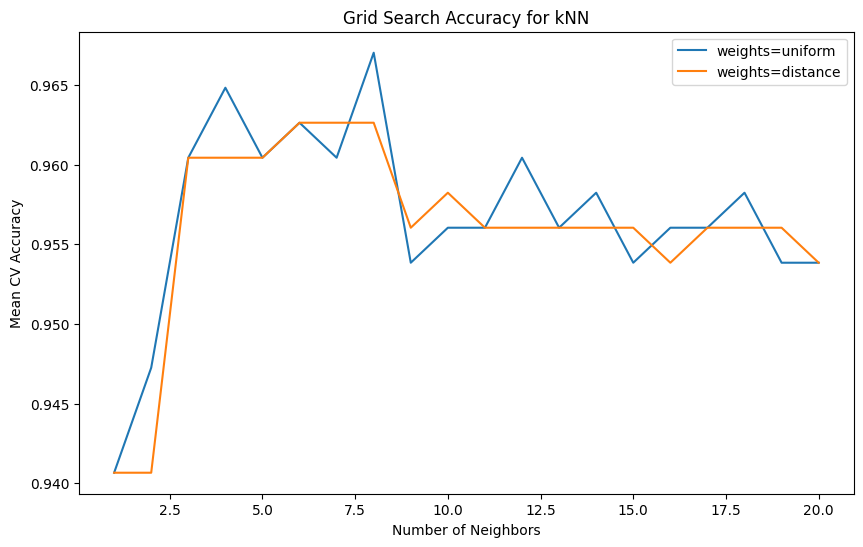

In [30]:
results = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(10,6))
for weight in ['uniform','distance']:
    subset = results[results['param_weights']==weight]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'weights={weight}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Accuracy for kNN')
plt.legend()
plt.show()

In [31]:
best_knn = grid.best_estimator_
y_train_pred = best_knn.predict(X_train)

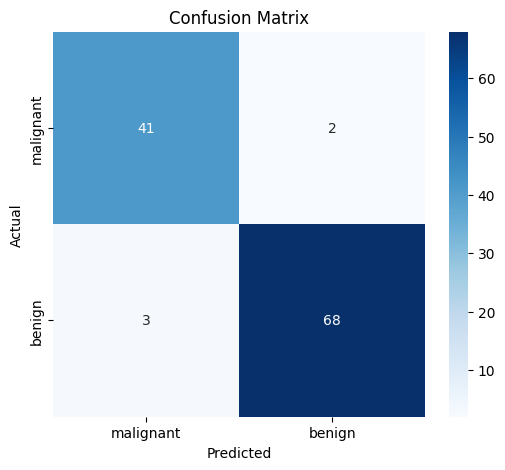

In [32]:
y_test_pred = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.956140350877193
